#  Time Series Graphics



In [63]:
import sys
sys.path.insert(0, '.')
from utils import *

[utils.py](utils.py)

##  `DataFrame`s



from rdatasets import dataWe're going to use the `parse_dates` argument quite a bit.  R's `tsibble` seems to do this automagically in many cases.

In [64]:
ls

00-Preface-to-this-readalong.ipynb      10-Dynamic-regression-models.ipynb
02-Time-series-graphics.ipynb           Contents.ipynb
03-Time-series-decomposition.ipynb      R-export-datasets.ipynb
04-Time-series-features.ipynb           README.md
05-The-forecasters-toolbox.ipynb        Save.R
06-Judgmental-forecasts.ipynb           __pycache__/
07-Time-series-regression-models.ipynb  data/
08-Exponential-smoothing.ipynb          i/
09-ARIMA-models.ipynb                   utils.py


In [65]:
olympic_running = pd.read_csv('data/olympic_running.csv', parse_dates=['Year'])
olympic_running

,Year,Length,Sex,Time
0,1896-01-01,100,men,12.00
1,1900-01-01,100,men,11.00
2,1904-01-01,100,men,11.00
3,1908-01-01,100,men,10.80
4,1912-01-01,100,men,10.80
...,...,...,...,...
307,2000-01-01,10000,women,1817.49
308,2004-01-01,10000,women,1824.36
309,2008-01-01,10000,women,1794.66
310,2012-01-01,10000,women,1820.75


In [66]:
PBS = pd.read_csv('data/PBS.csv', parse_dates=['Month'])
PBS

,Month,Concession,Type,ATC1,ATC1_desc,ATC2,ATC2_desc,Scripts,Cost
0,1991-07-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,18228,67877.0
1,1991-08-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15327,57011.0
2,1991-09-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,14775,55020.0
3,1991-10-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15380,57222.0
4,1991-11-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,14371,52120.0
...,...,...,...,...,...,...,...,...,...
67591,2008-02-01,General,Safety net,Z,NaN,Z,Z,135,1591.0
67592,2008-03-01,General,Safety net,Z,NaN,Z,Z,15,276.0
67593,2008-04-01,General,Safety net,Z,NaN,Z,Z,11,165.0
67594,2008-05-01,General,Safety net,Z,NaN,Z,Z,21,278.0


In [67]:
a10 = (
    PBS
    .query('ATC2 == "A10"')
    .groupby('Month', sort=False)
    .pipe(summarize, lambda x: dict(Cost = x.Cost.sum() / 1e6))
    .reset_index()
    .set_index('Month', drop=False)
)
a10

,Month,Cost
Month,,
1991-07-01,1991-07-01,3.526591
1991-08-01,1991-08-01,3.180891
1991-09-01,1991-09-01,3.252221
1991-10-01,1991-10-01,3.611003
1991-11-01,1991-11-01,3.565869
...,...,...
2008-02-01,2008-02-01,21.654285
2008-03-01,2008-03-01,18.264945
2008-04-01,2008-04-01,23.107677


##  Time plots

For time series data, the obvious graph to start with is a time plot. That is, the observations are plotted against the time of observation, with consecutive observations joined by straight lines.


Some date formats are just harder to parse.

In [68]:
pd.read_csv('data/ansett.csv').head(3)

,Week,Airports,Class,Passengers
0,1989 W28,ADL-PER,Business,193
1,1989 W29,ADL-PER,Business,254
2,1989 W30,ADL-PER,Business,185


In [69]:
def ansett_parse_week(week):
    y = int(week[:4])
    w = int(week[-2:])
    return pd.to_datetime(y, format='%Y') + pd.to_timedelta(w, 'w')

In [70]:
ansett = pd.read_csv('data/ansett.csv',
                     parse_dates=['Week'], date_parser=ansett_parse_week)
ansett

,Week,Airports,Class,Passengers
0,1989-07-16,ADL-PER,Business,193
1,1989-07-23,ADL-PER,Business,254
2,1989-07-30,ADL-PER,Business,185
3,1989-08-06,ADL-PER,Business,254
4,1989-08-13,ADL-PER,Business,191
...,...,...,...,...
7402,1992-10-28,SYD-PER,First,203
7403,1992-11-04,SYD-PER,First,137
7404,1992-11-11,SYD-PER,First,161
7405,1992-11-18,SYD-PER,First,155


In [71]:
melsyd_economy = ansett.query("Airports == 'MEL-SYD' and Class == 'Economy'")

In [72]:
melsyd_economy

,Week,Airports,Class,Passengers
3881,1987-07-02,MEL-SYD,Economy,20167
3882,1987-07-09,MEL-SYD,Economy,20161
3883,1987-07-16,MEL-SYD,Economy,19993
3884,1987-07-23,MEL-SYD,Economy,20986
3885,1987-07-30,MEL-SYD,Economy,20497
...,...,...,...,...
4158,1992-10-28,MEL-SYD,Economy,28837
4159,1992-11-04,MEL-SYD,Economy,26548
4160,1992-11-11,MEL-SYD,Economy,27279
4161,1992-11-18,MEL-SYD,Economy,27306


In [73]:
melsyd_economy.columns

Index(['Week', 'Airports', 'Class', 'Passengers'], dtype='object')

[Pandas](https://pandas.pydata.org/) and [seaborn](https://seaborn.pydata.org/index.html) provide lots of plotting functionality.  I almost always come back to using [matplotlib](https://matplotlib.org/) directly, but here's one example that lets Pandas kick off its own `Axes` instance.

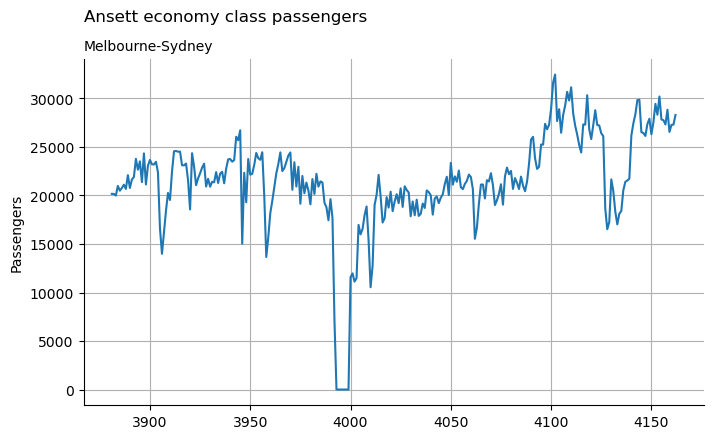

In [74]:
ax = melsyd_economy.Passengers.plot(figsize=sizets)
suptitle('Ansett economy class passengers')
ax.set(ylabel='Passengers', title='Melbourne-Sydney')
ax.grid()

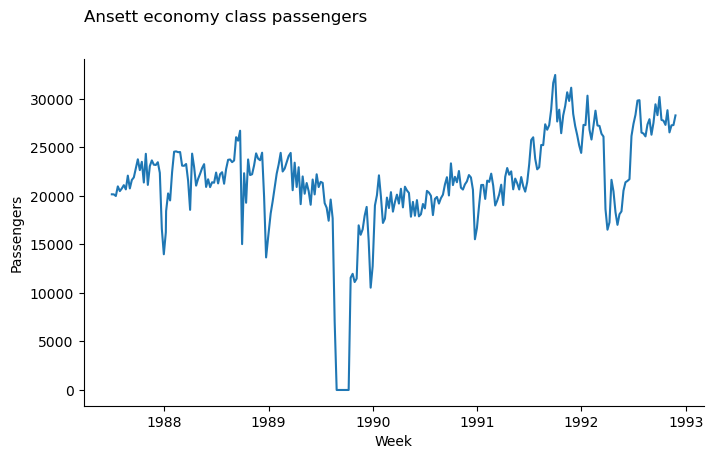

In [75]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

# time series plot for multiple columns
sb.lineplot(x="Week", y="Passengers", data=melsyd_economy)

# set label
suptitle('Ansett economy class passengers')
ax.set(ylabel='Passengers', title='Melbourne-Sydney')

plt.show();

The time plot immediately reveals some interesting features.

- There was a period in 1989 when no passengers were carried — this was due to an industrial dispute.
- There was a period of reduced load in 1992. This was due to a trial in which some economy class seats were replaced by business class seats.
- A large increase in passenger load occurred in the second half of 1991.
- There are some large dips in load around the start of each year. These are due to holiday effects.
- There is a long-term fluctuation in the level of the series which increases during 1987, decreases in 1989, and increases again through 1990 and 1991.

Any model will need to take all these features into account in order to effectively forecast the passenger load into the future.

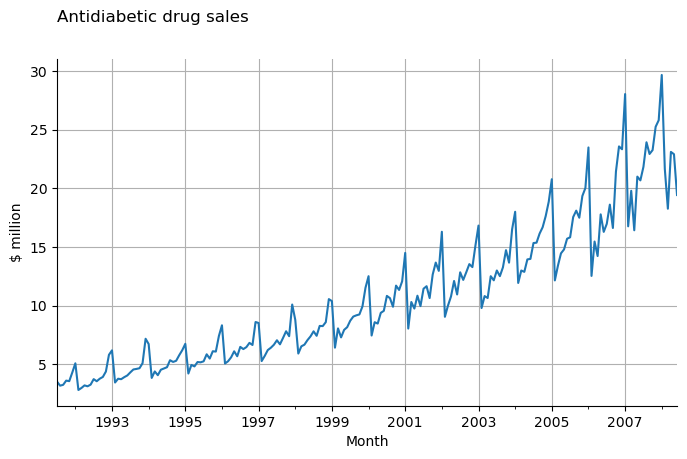

In [76]:
ax = a10.Cost.plot(figsize=sizets)
suptitle('Antidiabetic drug sales')
ax.set(ylabel='$ million')
ax.grid()

Here, there is a clear and increasing trend. There is also a strong seasonal pattern that increases in size as the level of the series increases. The sudden drop at the start of each year is caused by a government subsidisation scheme that makes it cost-effective for patients to stockpile drugs at the end of the calendar year. Any forecasts of this series would need to capture the seasonal pattern, and the fact that the trend is changing slowly.



## Time series patterns

In describing these time series, we have used words such as “trend” and “seasonal” which need to be defined more carefully.

### Trend
A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear. Sometimes we will refer to a trend as “changing direction”, when it might go from an increasing trend to a decreasing trend. There is a trend in the antidiabetic drug sales data shown in Figure 2.2.

### Seasonal
A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week. Seasonality is always of a fixed and known period. The monthly sales of antidiabetic drugs (Figure 2.2) shows seasonality which is induced partly by the change in the cost of the drugs at the end of the calendar year.

### Cyclic
A cycle occurs when the data exhibit rises and falls that are not of a fixed frequency. These fluctuations are usually due to economic conditions, and are often related to the “business cycle”. The duration of these fluctuations is usually at least 2 years.
Many people confuse cyclic behaviour with seasonal behaviour, but they are really quite different. If the fluctuations are not of a fixed frequency then they are cyclic; if the frequency is unchanging and associated with some aspect of the calendar, then the pattern is seasonal. In general, the average length of cycles is longer than the length of a seasonal pattern, and the magnitudes of cycles tend to be more variable than the magnitudes of seasonal patterns.

Many time series include trend, cycles and seasonality. When choosing a forecasting method, we will first need to identify the time series patterns in the data, and then choose a method that is able to capture the patterns properly.In describing these time series, we have used words such as “trend” and “seasonal” which need to be defined more carefully.



![](./i/fourexamples-1.png)

1- The monthly housing sales (top left) show strong seasonality within each year, as well as some strong cyclic behaviour with a period of about 6–10 years. There is no apparent trend in the data over this period.

2- The US treasury bill contracts (top right) show results from the Chicago market for 100 consecutive trading days in 1981. Here there is no seasonality, but an obvious downward trend. Possibly, if we had a much longer series, we would see that this downward trend is actually part of a long cycle, but when viewed over only 100 days it appears to be a trend.

3- The Australian quarterly electricity production (bottom left) shows a strong increasing trend, with strong seasonality. There is no evidence of any cyclic behaviour here.

4- The daily change in the Google closing stock price (bottom right) has no trend, seasonality or cyclic behaviour. There are random fluctuations which do not appear to be very predictable, and no strong patterns that would help with developing a forecasting model.



## 2.4 Seasonal plots

[FPP3 Section 2.4](https://otexts.com/fpp3/seasonal-plots.html)

I would not be surprised to learn there's an easier way to do this.

In [77]:
def seasonalize(data, column, period='year'):
    if period.lower() in ('year', 'y'):
        d = data.assign(
            __period = data.index.year,
            __x = data.index.dayofyear)
    elif period.lower() in ('week', 'w'):
        d = data.assign(
            __period = 100*data.index.year + data.index.week,
            __x = data.index.dayofweek
                + (data.index.hour + data.index.minute/60 + data.index.second/3600) / 24)
    elif period.lower() in ('day', 'd'):
        d = data.assign(
            __period = data.index.date,
            __x = data.index.hour + data.index.minute/60 + data.index.second/3600)
    d = (
        d
        .sort_values('__x')
        .groupby('__period')
        .pipe(summarize, lambda x: {'time': list(x.__x), column: list(x[column])})
    )
    return d

def plot_seasonal(
        data, column,
        period='year',
        cmap='viridis',
        labels='',
        figsize=None,
        ax=None,
        **kw):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig, ax = ax.figure, ax
    d = seasonalize(data, column, period)
    cm = plt.get_cmap(cmap)
    for (i, p) in enumerate(d.index):
        color = cm(i / len(d))
        x, y = d.time.loc[p], d[column].loc[p]
        ax.plot(x, y, color=color, label=str(p), **kw)
        if labels in 'right both'.split():
            ax.text(x[-1], y[-1], str(p), color=color, ha='center', va='center')
        if labels in 'left both'.split():
            ax.text(x[0], y[0], str(p), color=color, ha='center', va='center')
    return ax

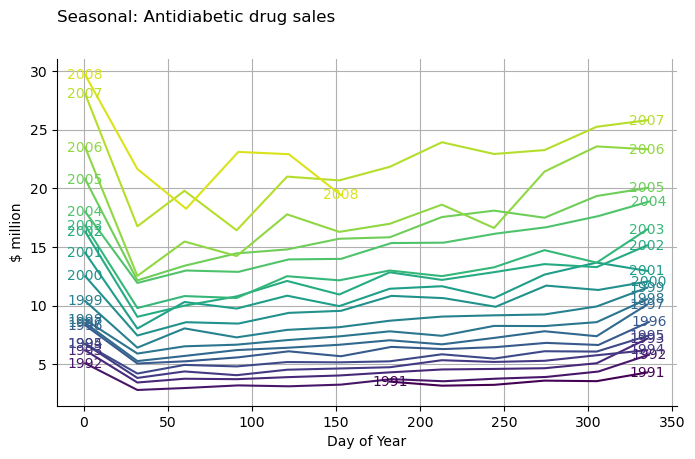

In [78]:
ax = plot_seasonal(a10, 'Cost', labels='both', figsize=sizets)
suptitle('Seasonal: Antidiabetic drug sales')
ax.set(xlabel='Day of Year', ylabel='$ million')
ax.grid()

These are exactly the same data as were shown earlier, but now the data from each season are overlapped. A seasonal plot allows the underlying seasonal pattern to be seen more clearly, and is especially useful in identifying years in which the pattern changes.

In this case, it is clear that there is a large jump in sales in January each year. Actually, these are probably sales in late December as customers stockpile before the end of the calendar year, but the sales are not registered with the government until a week or two later. The graph also shows that there was an unusually small number of sales in March 2008 (most other years show an increase between February and March). The small number of sales in June 2008 is probably due to incomplete counting of sales at the time the data were collected.



### 2.5.1 Multiple seasonal periods

Where the data has more than one seasonal pattern, the period argument can be used to select which seasonal plot is required. The vic_elec data contains half-hourly electricity demand for the state of Victoria, Australia. 

In [79]:
vic_elec = (
    pd.read_csv('data/vic_elec.csv')
    .pipe(compute, lambda x: dict(Time = pd.to_datetime(x.Time)))
    .set_index('Time')
)

In the first plot, the three days with 25 hours are when daylight saving ended in each year and so these days contained an extra hour. There were also three days with only 23 hours each (when daylight saving started) but these are hidden beneath all the other lines on the plot.

CPU times: user 418 ms, sys: 26.2 ms, total: 444 ms
Wall time: 410 ms


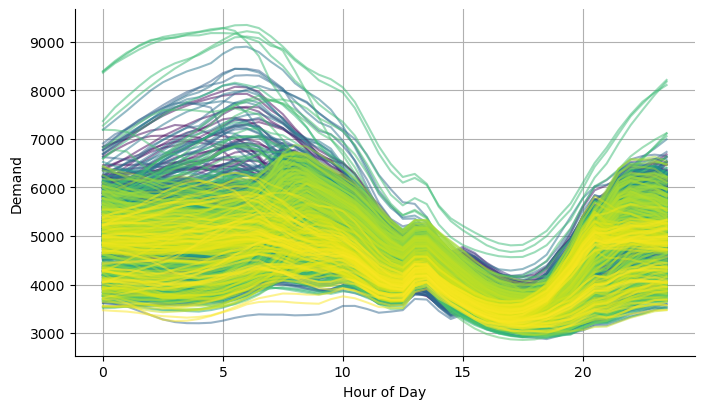

In [80]:
%%time
ax = plot_seasonal(vic_elec, 'Demand', period='d', alpha=.5, figsize=sizets)
ax.set(xlabel='Hour of Day', ylabel='Demand')
ax.grid()

/var/folders/gy/ggsrtsh527x0w4bhcr8s0z140000gn/T/ipykernel_90941/484420594.py:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  __period = 100*data.index.year + data.index.week,


CPU times: user 230 ms, sys: 15.3 ms, total: 245 ms
Wall time: 243 ms


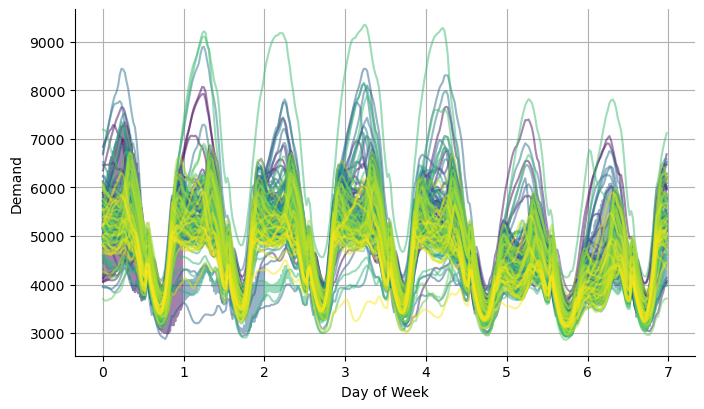

In [81]:
%%time
ax = plot_seasonal(vic_elec, 'Demand', period='w', alpha=.5, figsize=sizets)
ax.set(xlabel='Day of Week', ylabel='Demand')
ax.grid()

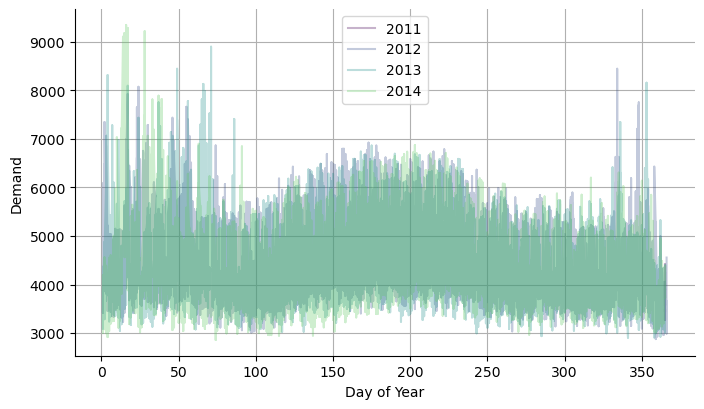

In [82]:
ax = plot_seasonal(vic_elec, 'Demand', period='y', alpha=.3, figsize=sizets)
ax.legend()
ax.set(xlabel='Day of Year', ylabel='Demand')
ax.grid()

## 2.5 Seasonal subseries plots

Seasonal subseries plots
An alternative plot that emphasises the seasonal patterns is where the data for each season are collected together in separate mini time plots.Seasonal subseries plots
An alternative plot that emphasises the seasonal patterns is where the data for each season are collected together in separate mini time plots.

Somewhat awkwardly with [seaborn FaceGrid()](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html):

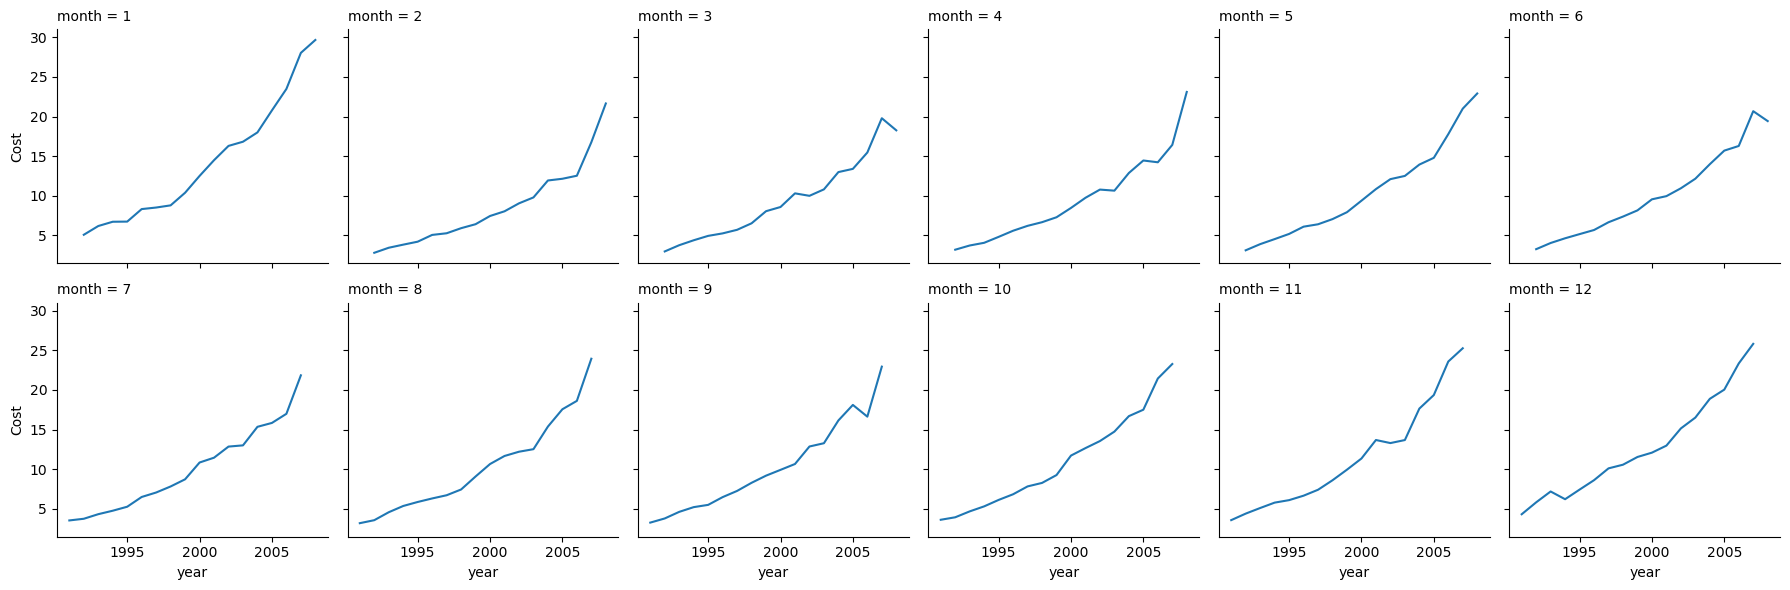

In [83]:
d = a10.assign(year=a10.index.year, month=a10.index.month)
g = sns.FacetGrid(d, col='month', col_wrap=6)
g.map(plt.plot, 'year', 'Cost');

The blue horizontal lines indicate the means for each month. This form of plot enables the underlying seasonal pattern to be seen clearly, and also shows the changes in seasonality over time. It is especially useful in identifying changes within particular seasons. In this example, the plot is not particularly revealing; but in some cases, this is the most useful way of viewing seasonal changes over time.



Or, easier with [statsmodels month_plot()](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.month_plot.html):

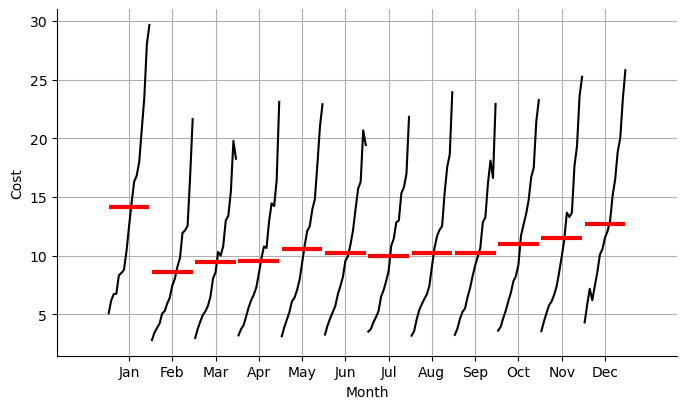

In [84]:
fig, ax = plt.subplots()
sm.graphics.tsa.month_plot(a10.Cost, ax=ax)
ax.set(xlabel='Month', ylabel='Cost')
ax.grid();

This next case is kind of ugly.  The DateTimeIndex is non-unique; it probably should be a [multi-index](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html).

Example: Australian holiday tourism

Australian quarterly vacation data provides an interesting example of how these plots can reveal information.  To get the total visitor nights spent on Holiday by State for each quarter (i.e., ignoring Regions) we can use the following code. Note that we do not have to explicitly group by the time index as this is required in a tsibble.



In [85]:
holidays = (
    pd.read_csv('data/tourism.csv')
    .pipe(compute, lambda x: dict(
        date=pd.to_datetime(x.Quarter.str.replace(' ', ''))
    ))
    .groupby(['State', 'Quarter', 'date'])
    .pipe(summarize, lambda x: dict(
        Trips=x.Trips.sum(),
    ))
    .reset_index()
    .set_index('date', drop=False)
)
holidays

,State,Quarter,date,Trips
date,,,,
1998-01-01,ACT,1998 Q1,1998-01-01,551.001921
1998-04-01,ACT,1998 Q2,1998-04-01,416.025623
1998-07-01,ACT,1998 Q3,1998-07-01,436.029011
1998-10-01,ACT,1998 Q4,1998-10-01,449.798445
1999-01-01,ACT,1999 Q1,1999-01-01,378.572817
...,...,...,...,...
2016-10-01,Western Australia,2016 Q4,2016-10-01,2656.330701
2017-01-01,Western Australia,2017 Q1,2017-01-01,2570.911689
2017-04-01,Western Australia,2017 Q2,2017-04-01,2438.487939


Time plots of each series show that there is strong seasonality for most states, but that the seasonal peaks do not coincide.



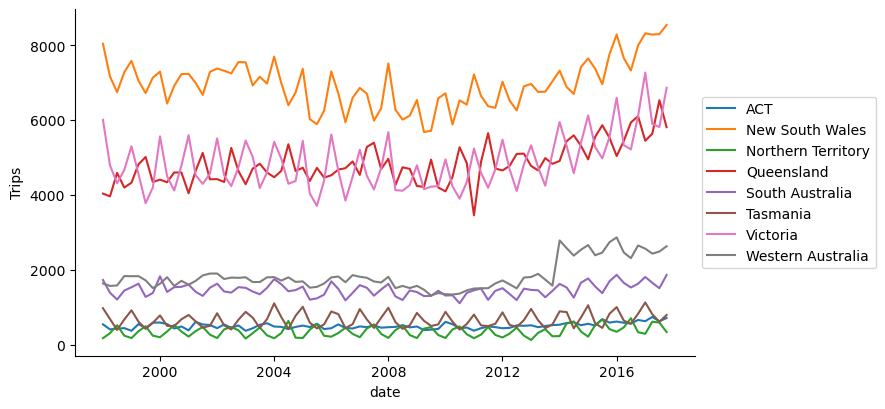

In [86]:
ax = sns.lineplot( data=holidays, x= 'date', y= 'Trips', hue='State')
ax.legend(**legend_right);

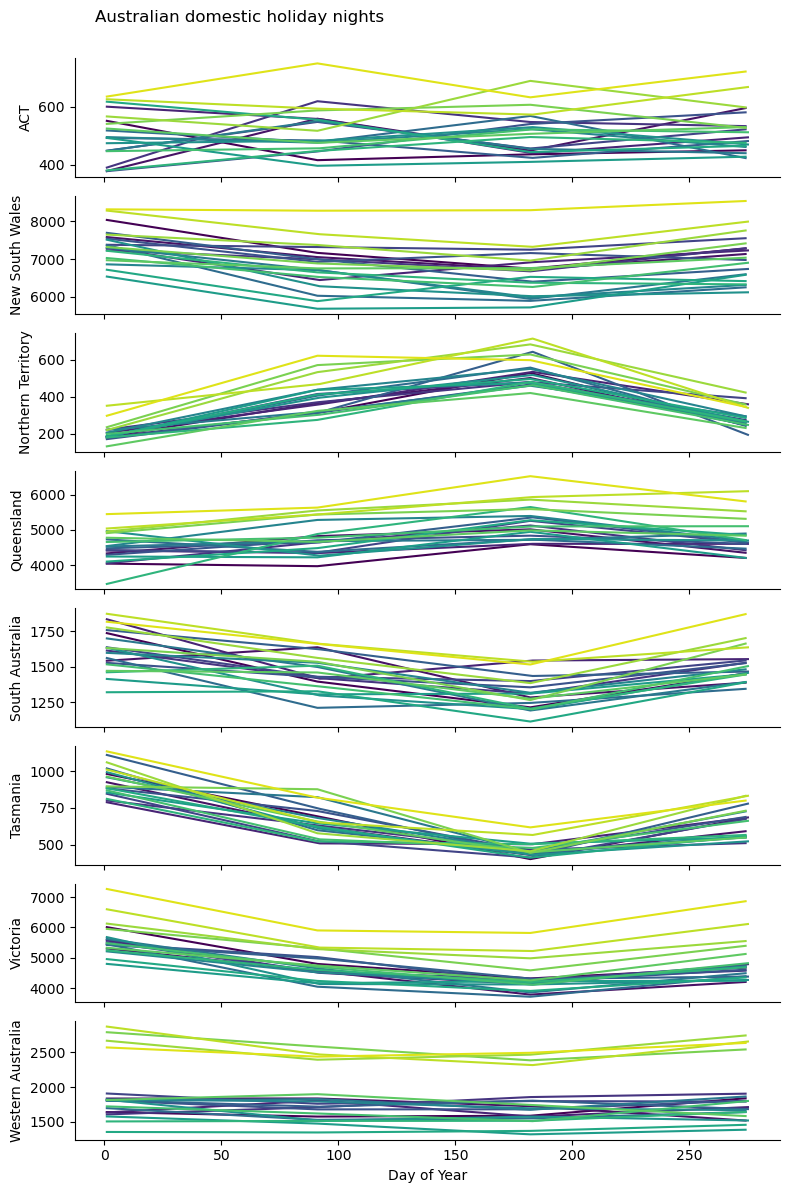

In [87]:
fig, axs = plt.subplots(holidays.State.nunique(), 1, figsize=(8,12), sharex=True)
for (ax, (State, d)) in zip(axs, holidays.groupby('State')):
    plot_seasonal(d.set_index('date'), 'Trips', ax=ax)
    ax.set(ylabel=State)
ax.set(xlabel='Day of Year')
suptitle('Australian domestic holiday nights')
plt.tight_layout()
fig.subplots_adjust(top=.95)

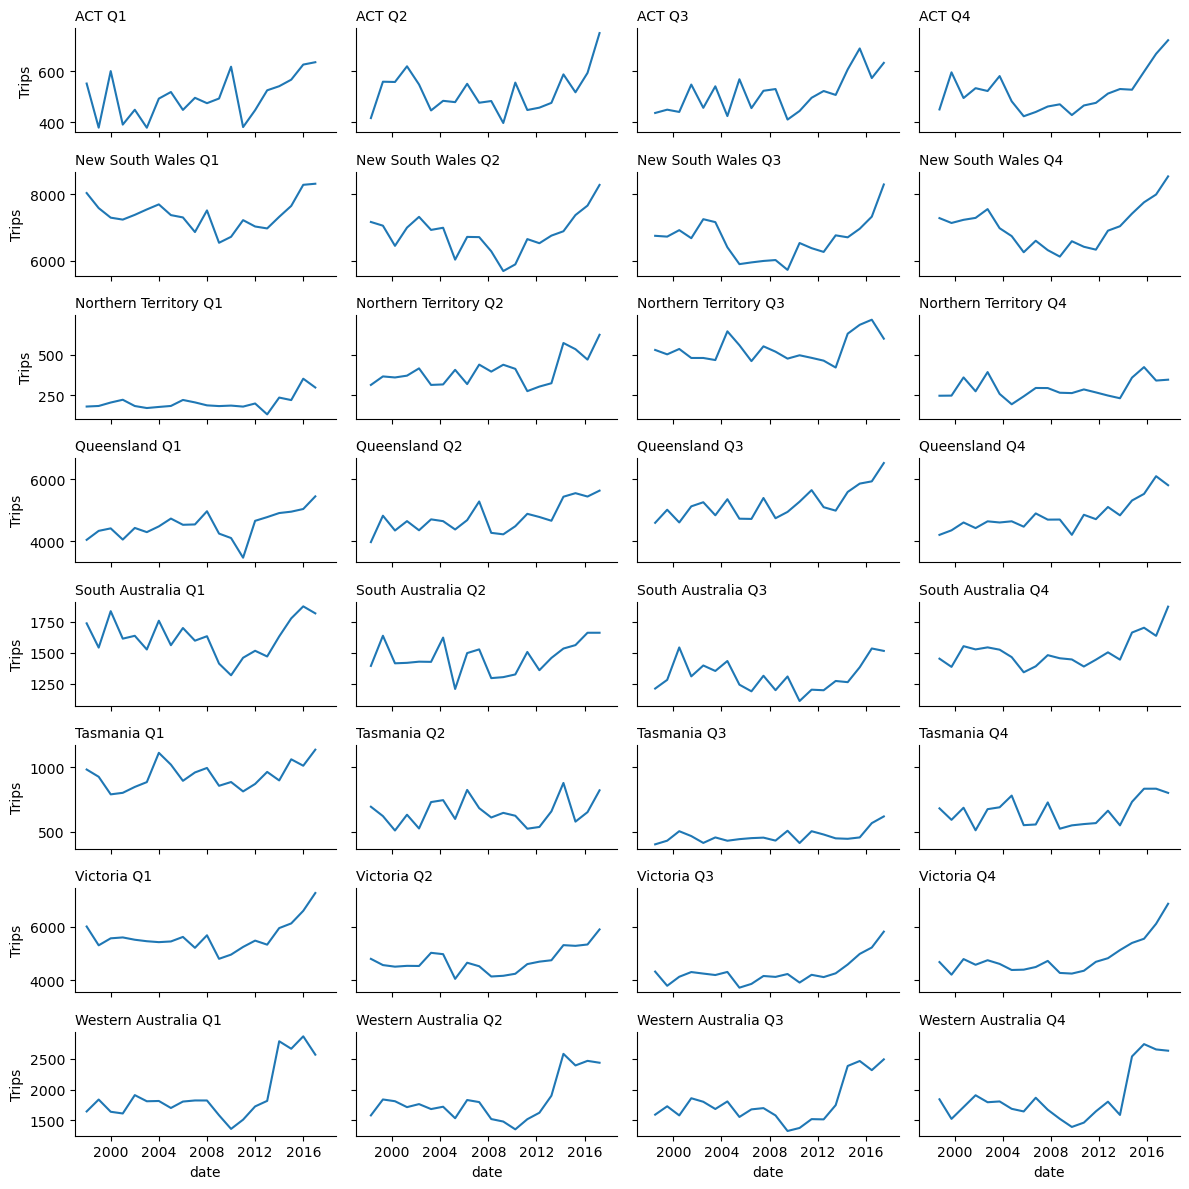

In [88]:
d = holidays.assign(Q = holidays.index.quarter)
g = sns.FacetGrid(d, col='Q', row='State', height=1.5, aspect=2,
                  sharey='row', #margin_titles=True,
                  )
g = g.map(plt.plot, 'date', 'Trips').set_titles('{row_name} Q{col_name}')

This figure makes it evident that Western Australian tourism has jumped markedly in recent years, while Victorian tourism has increased in Q1 and Q4 but not in the middle of the year.

## 2.6 Scatterplots

half-hourly electricity demand (in Gigawatts) and temperature (in degrees Celsius), for 2014 in Victoria, Australia. The temperatures are for Melbourne, the largest city in Victoria, while the demand values are for the entire state.half-hourly electricity demand (in Gigawatts) and temperature (in degrees Celsius), for 2014 in Victoria, Australia. The temperatures are for Melbourne, the largest city in Victoria, while the demand values are for the entire state.


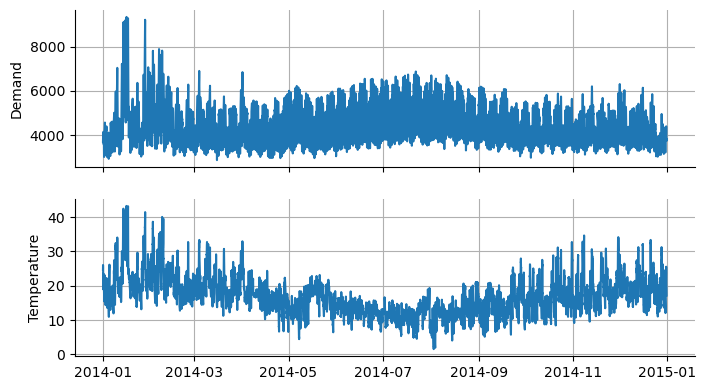

In [89]:
fig, axs = plt.subplots(2, sharex=True)
d = vic_elec[vic_elec.index.year == 2014]
ax = axs[0]
ax.plot(d.Demand)
ax.set(xlabel='', ylabel='Demand')
ax.grid()

ax = axs[1]
ax.plot(d.Temperature)
ax.set(xlabel='', ylabel='Temperature')
ax.grid();

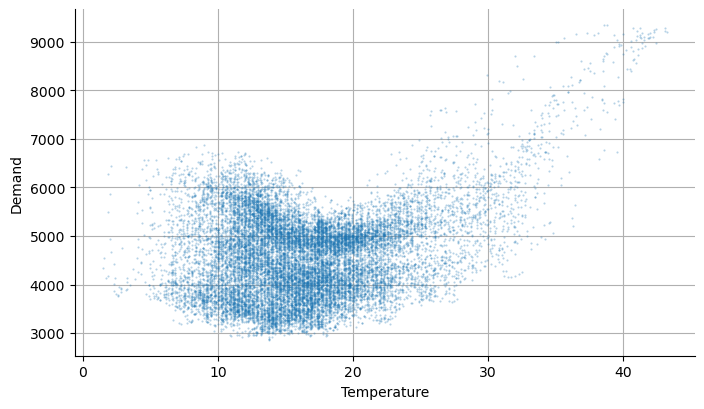

In [90]:
fig, ax = plt.subplots()
ax.plot(d.Temperature, d.Demand, '.', alpha=.33, ms=1)
ax.set(xlabel='Temperature', ylabel='Demand')
ax.grid()

We can study the relationship between demand and temperature by plotting one series against the other.

This scatterplot helps us to visualise the relationship between the variables. It is clear that high demand occurs when temperatures are high due to the effect of air-conditioning. But there is also a heating effect, where demand increases for very low temperatures.




Correlation
It is common to compute correlation coefficients to measure the strength of the linear relationship between two variables. The correlation between variables x and  y  is given by

$$ r = \frac{\sum (x_{t} - \bar{x})(y_{t}-\bar{y})}{\sqrt{\sum(x_{t}-\bar{x})^2}\sqrt{\sum(y_{t}-\bar{y})^2}}.$$


The value of  r always lies between   −1 and 1 with negative values indicating a negative relationship and positive values indicating a positive relationship.

![](./i/corr-1.png)

The correlation coefficient only measures the strength of the linear relationship between two variables, and can sometimes be misleading. For example, the correlation for the electricity demand and temperature data shown in Figure 2.14 is 0.28, but the non-linear relationship is stronger than that.

![](./i/anscombe-1.png)

all have correlation coefficients of 0.82, but they have very different relationships. This shows how important it is to look at the plots of the data and not simply rely on correlation values

### Pair plots



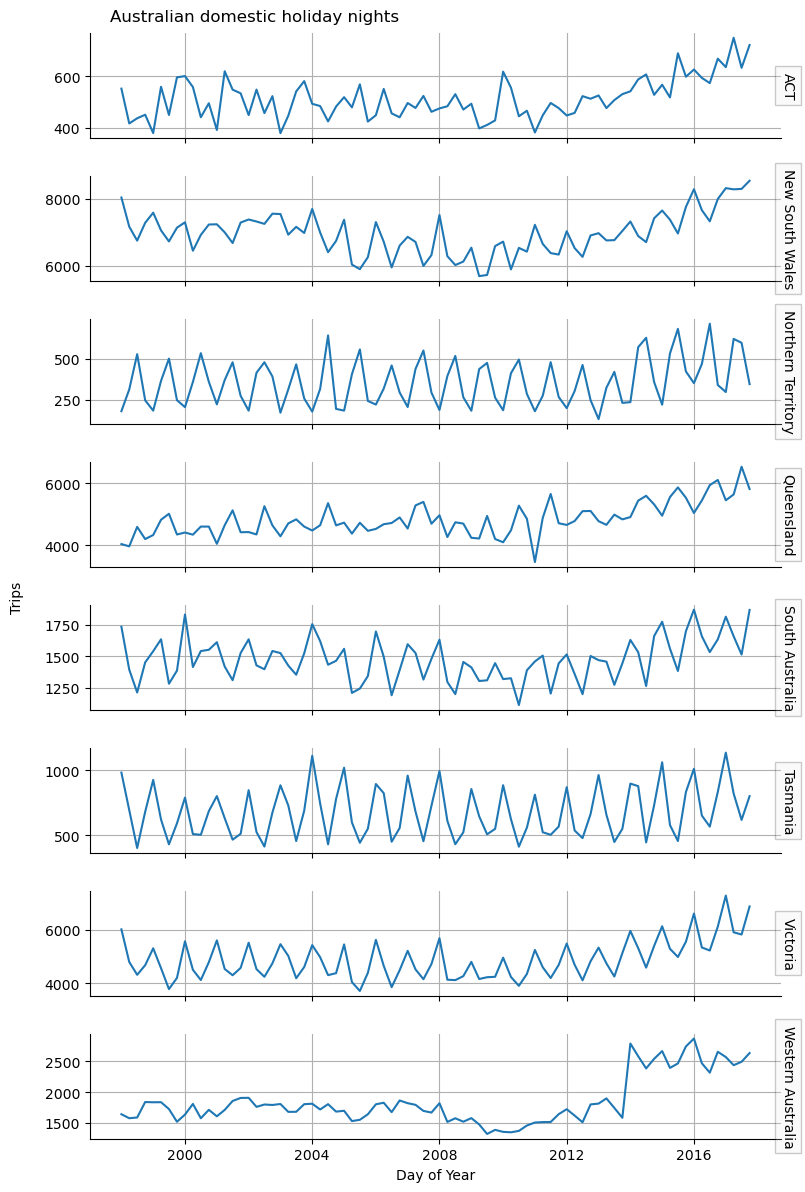

In [91]:
fig, axs = plt.subplots(holidays.State.nunique(), 1, figsize=(8,12), sharex=True)
for (ax, (State, d)) in zip(axs, holidays.groupby('State')):
    ax.plot(d.Trips)
    rlabel(ax, State)
    ax.grid()
ax.set(xlabel='Day of Year')
suptitle('Australian domestic holiday nights')
fig.text(0, .5, 'Trips', rotation=90, va='center')
plt.tight_layout()
fig.subplots_adjust(top=.97, left=.1)

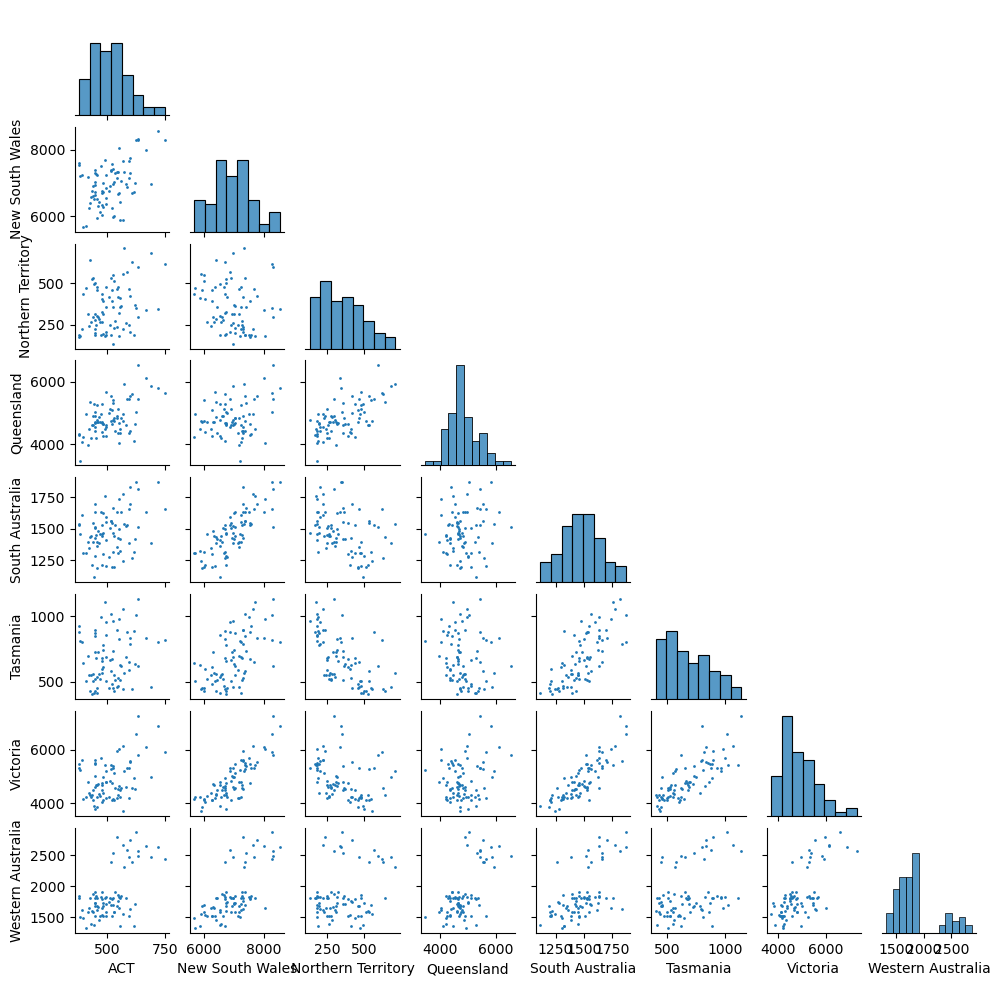

In [92]:
d = holidays.pivot(index='date', columns='State', values='Trips')
sns.pairplot(d, plot_kws=dict(linewidth=0, s=4), corner=True, height=1.25)

For each panel, the variable on the vertical axis is given by the variable name in that row, and the variable on the horizontal axis is given by the variable name in that column. There are many options available to produce different plots within each panel. In the default version, the correlations are shown in the upper right half of the plot, while the scatterplots are shown in the lower half. On the diagonal are shown density plots.

The value of the scatterplot matrix is that it enables a quick view of the relationships between all pairs of variables. In this example, mostly positive relationships are revealed, with the strongest relationships being between the neighbouring states located in the south and south east coast of Australia, namely, New South Wales, Victoria and South Australia. Some negative relationships are also revealed between the Northern Territory and other regions. The Northern Territory is located in the north of Australia famous for its outback desert landscapes visited mostly in winter. Hence, the peak visitation in the Northern Territory is in the July (winter) quarter in contrast to January (summer) quarter for the rest of the regions.

##  Lag plots
isplays scatterplots of quarterly Australian beer production , where the horizontal axis shows lagged values of the time series. Each graph shows  $y_t$ plotted against $y{t-k}$ for different values of  k.

In [93]:
d = pd.read_csv('data/aus_production.csv')
recent_production = (
    d
    .assign(Date=pd.to_datetime(d.Quarter.str.replace(' ', '')))
    .pipe(compute, lambda x: dict(Year=x.Date.dt.year))
    .query('Year >= 1992')
    .set_index('Date', drop=False)
    .drop(columns='Date Year'.split())
)

recent_production

,Quarter,Beer,Tobacco,Bricks,Cement,Electricity,Gas
Date,,,,,,,
1992-01-01,1992 Q1,443,5777.0,383.0,1289,38332,117
1992-04-01,1992 Q2,410,5853.0,404.0,1501,39774,151
1992-07-01,1992 Q3,420,6416.0,446.0,1539,42246,175
1992-10-01,1992 Q4,532,5825.0,420.0,1568,38498,129
1993-01-01,1993 Q1,433,5724.0,394.0,1450,39460,116
...,...,...,...,...,...,...,...
2009-04-01,2009 Q2,398,NaN,NaN,2160,57471,238
2009-07-01,2009 Q3,419,NaN,NaN,2325,58394,252
2009-10-01,2009 Q4,488,NaN,NaN,2273,57336,210


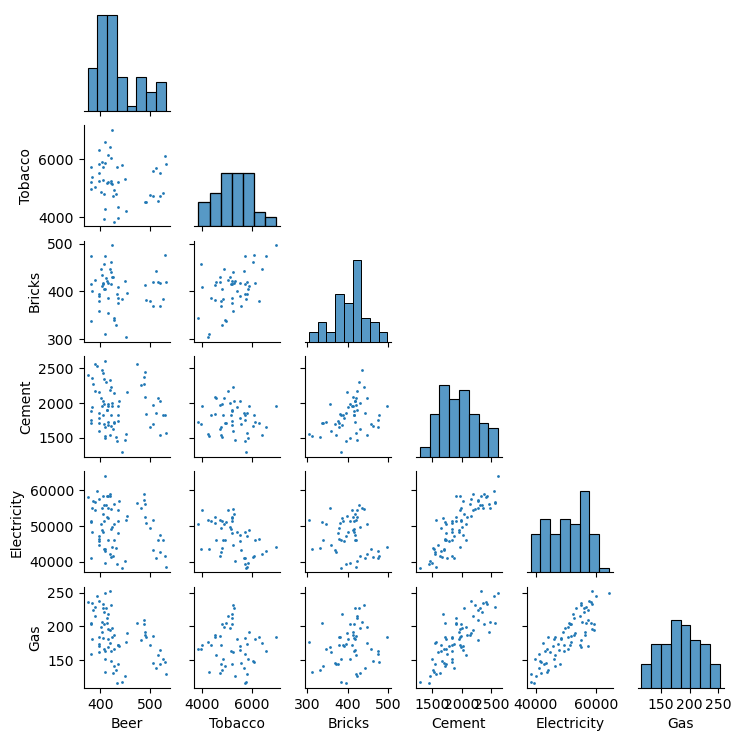

In [94]:
sns.pairplot(recent_production, plot_kws=dict(linewidth=0, s=4), corner=True, height=1.25)

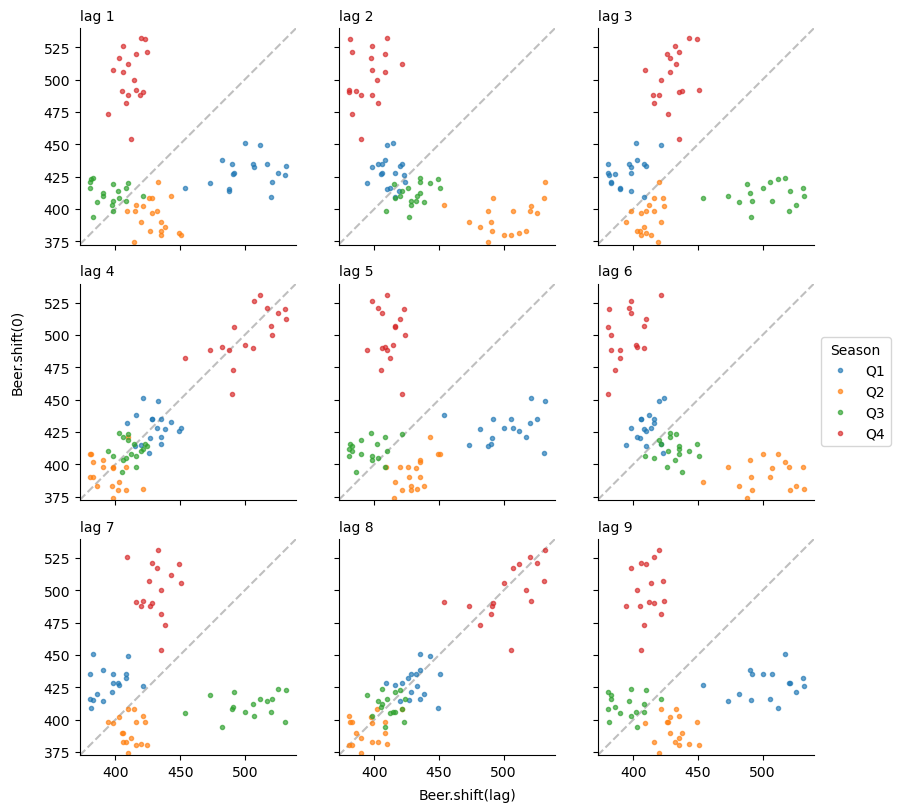

In [95]:
fig, axs = plt.subplots(3, 3, figsize=(9,8), sharex=True, sharey=True)
D = recent_production.copy()
D = pd.DataFrame({lag: D.Beer.shift(lag) for lag in range(10)})
D['q'] = recent_production.index.quarter
for (i, ax) in enumerate(axs.ravel()):
    for (q, d) in D.groupby('q'):
        ax.plot(d[i+1], d[0], '.', alpha=.66, label=f'Q{q}')
        lim = ax.get_xlim()
    ax.plot(lim, lim, 'k--', alpha=.25, zorder=-10)
    ax.set(xlim=lim, ylim=lim, title=f'lag {i+1}', aspect='equal')
axs.ravel()[5].legend(loc='center left', bbox_to_anchor=[1, .5], title='Season')
fig.text(.5, -.01, 'Beer.shift(lag)', ha='center', va='bottom')
fig.text(0, .5, 'Beer.shift(0)', ha='center', va='bottom', rotation=90)
plt.tight_layout()

Here the colours indicate the quarter of the variable on the vertical axis. The relationship is strongly positive at lags 4 and 8, reflecting the strong seasonality in the data. The negative relationship seen for lags 2 and 6 occurs because peaks (in Q4) are plotted against troughs (in Q2)

## 2.8 Autocorrelation

Just as correlation measures the extent of a linear relationship between two variables, autocorrelation measures the linear relationship between lagged values of a time series.

There are several autocorrelation coefficients, corresponding to each panel in the lag plot. For example,  $r_1$ measures the relationship between  
$y_t$  and  $y_{t-1}$,  $r^2$ measures the relationship between  $y_t$ and   $y_{t−2}$, and so on.
The value of  $r_k$ can be written as

$$r_{k} = \frac{\sum\limits_{t=k+1}^T (y_{t}-\bar{y})(y_{t-k}-\bar{y})}
{\sum\limits_{t=1}^T (y_{t}-\bar{y})^2}$$

where $T$ is the length of the time series. The autocorrelation coefficients make up the autocorrelation function or ACF.

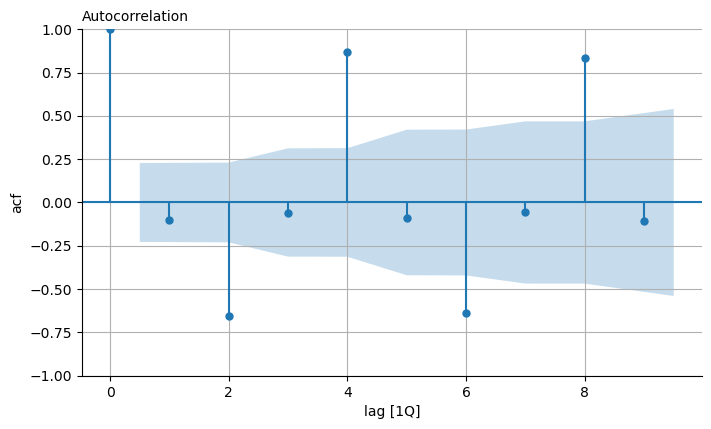

In [96]:
fig, ax = plt.subplots(figsize=sizets)
sm.graphics.tsa.plot_acf(recent_production.Beer, ax=ax, lags=9)
ax.set(ylim=(-1,1), xlabel='lag [1Q]', ylabel='acf')
plt.grid()

The values in the acf column are  $r_1$,…,$r_9$, corresponding to the nine scatterplots in Figure 2.19. We usually plot the ACF to see how the correlations change with the lag  k . The plot is sometimes known as a correlogram.


- $r_4$  is higher than for the other lags. This is due to the seasonal pattern in the data: the peaks tend to be four quarters apart and the troughs tend to be four quarters apart.

- $r_2$  is more negative than for the other lags because troughs tend to be two quarters behind peaks.

- The dashed blue lines indicate whether the correlations are significantly different from zero 

### Trend and seasonality in ACF plots

When data have a trend, the autocorrelations for small lags tend to be large and positive because observations nearby in time are also nearby in value. So the ACF of a trended time series tends to have positive values that slowly decrease as the lags increase.

When data are seasonal, the autocorrelations will be larger for the seasonal lags (at multiples of the seasonal period) than for other lags.

When data are both trended and seasonal, you see a combination of these effects. The a10 data plotted in Figure 2.2 shows both trend and seasonality. Its ACF is shown in Figure 2.21. The slow decrease in the ACF as the lags increase is due to the trend, while the “scalloped” shape is due to the seasonality.

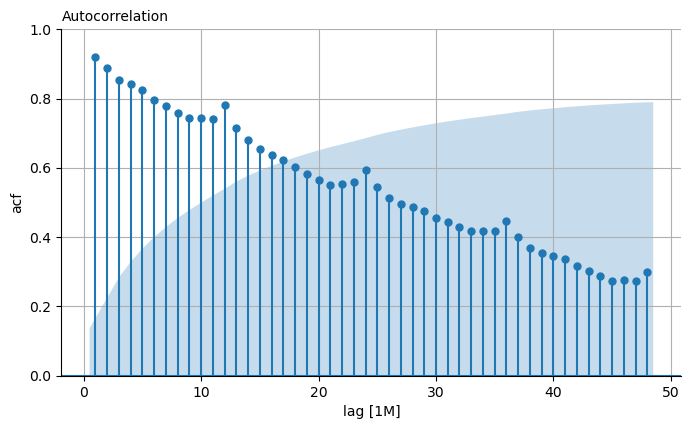

In [97]:
fig, ax = plt.subplots(figsize=sizets)
sm.graphics.tsa.plot_acf(a10.Cost, ax=ax, lags=np.r_[1:48+1])
ax.set(ylim=(0,1), xlabel='lag [1M]', ylabel='acf')
plt.grid()

## White noise

Time series that show no autocorrelation are called white noise.

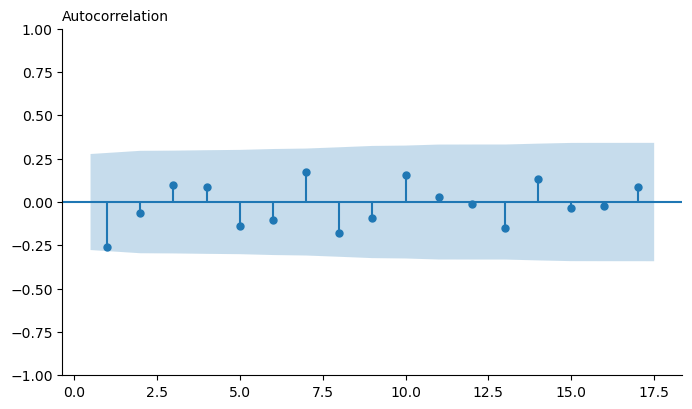

In [98]:
sm.graphics.tsa.plot_acf(np.random.normal(size=50), lags=np.r_[1:18]);

For white noise series, we expect each autocorrelation to be close to zero. Of course, they will not be exactly equal to zero as there is some random variation. For a white noise series, we expect 95% of the spikes in the ACF to lie within $ ±2/ \sqrt{T}$ where $T$ is the length of the time series. 
It is common to plot these bounds on a graph of the ACF (the blue dashed lines above). If one or more large spikes are outside these bounds, or if substantially more than 5% of spikes are outside these bounds, then the series is probably not white noise.

In this example,  $T=50$ and so the bounds are at  $ ±2/ \sqrt{50}$
 . All of the autocorrelation coefficients lie within these limits, confirming that the data are white noise.

<hr/>